Naive Bayes

The Naive Bayes classifier is a probabilistic machine learning model used for classification tasks. It is based on Bayes' theorem, with the "naive" assumption that features (or predictors) are independent given the class. Despite this often unrealistic assumption of feature independence, Naive Bayes classifiers perform surprisingly well in many real-world applications, particularly in text classification and natural language processing.

1. Data Exploration and Preprocessing

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK data files (run this once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nihal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nihal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data=pd.read_csv("blogs.csv")
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
data.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [5]:
data.isnull().sum()

Data      0
Labels    0
dtype: int64

In [6]:
data[data.duplicated()]

,Data,Labels


In [7]:
data.drop_duplicates()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [8]:
# Function to clean text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Load stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)

# Apply preprocessing
data['cleaned_text'] = data['Data'].apply(preprocess_text)
data['cleaned_text']

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: cleaned_text, Length: 2000, dtype: object

In [9]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

In [10]:
# Display sentiment distribution
print(data['sentiment'].value_counts())

positive    1451
negative     546
neutral        3
Name: sentiment, dtype: int64


In [11]:
data

,Data,Labels,cleaned_text,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...,negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...,positive
...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion120945 ...,positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc837...,positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins41030 ta...,positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc836...,positive


<Axes: xlabel='sentiment', ylabel='count'>

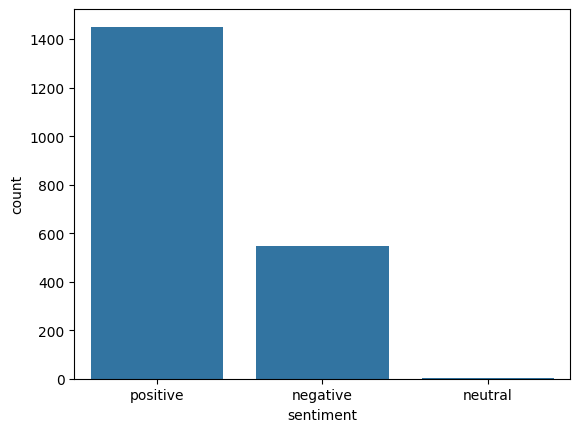

In [12]:
sns.countplot(x='sentiment',data=data)

In [13]:
# Separate features (X) and target (y)
x = data['Data'].astype(str)  # Features: review_text column
y = data['Labels']                # Target: sentiment column

2. Naive Bayes Model for Text Classification

In [14]:
# Split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
x_train = vectorizer.fit_transform(x_train)

# Transform the test data
x_test= vectorizer.transform(x_test)

In [16]:
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(x_train,y_train)


MultinomialNB()

4. Evaluation

In [17]:
# Predict sentiment on the test set
y_pred = nb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0.7375

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.58      0.83      0.68        18
           comp.graphics       0.81      0.72      0.76        18
 comp.os.ms-windows.misc       0.77      0.91      0.83        22
comp.sys.ibm.pc.hardware       0.72      0.84      0.78        25
   comp.sys.mac.hardware       0.83      0.48      0.61        21
          comp.windows.x       1.00      0.20      0.33        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.73      0.89      0.80        18
         rec.motorcycles       0.87      0.81      0.84        16
      rec.sport.baseball       0.94      0.83      0.88        18
        rec.sport.hockey       0.62      1.00      0.77        15
               sci.crypt       0.59      1.00      0.75        19
         sci.electronics       0.77      0.62      0.69        16
                 sci.med       0.81      0.7

In conclusion, the Naive Bayes classifier, with proper preprocessing and feature extraction, can effectively categorize blog posts. Performance evaluation using metrics such as accuracy, precision, recall, and F1-score provides a comprehensive view of the model’s effectiveness. Challenges such as class imbalance and text preprocessing need careful handling to ensure robust performance.

Sentiment analysis adds another layer of understanding, revealing the emotional tone of the blog posts. These insights can be crucial for content strategy, reader engagement, and marketing efforts.

By combining text classification with sentiment analysis, you gain a powerful toolkit for extracting and leveraging insights from textual data, enhancing both the analytical and strategic capabilities of your organization.